In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import re

In [5]:
def is_all_letters(word):
    return bool(re.match("^[a-zA-Z]+$", word))

In [60]:
with open('./github/english-words.70', 'r', encoding='latin1') as file:
    words = file.readlines()

In [61]:
words[:10]

['aalii\n',
 'aardwolf\n',
 'aardwolves\n',
 'aba\n',
 'abaca\n',
 'abacas\n',
 'abacist\n',
 'abampere\n',
 'abamperes\n',
 'abamps\n']

In [62]:
len(words)

33270

In [63]:
words[-1][:-1]

'étuis'

In [64]:
is_all_letters(words[0][:-1])

True

In [65]:
words = np.array([word[:-1]for word in words if is_all_letters(word[:-1])])

In [66]:
len(words)

33190

In [67]:
def contains_uppercase(word):
    return bool(re.search(r'[A-Z]', word))

In [68]:
[word for word in words if contains_uppercase(word)]

[]

In [69]:
length = np.array([len(word) for word in words])

In [70]:
mask = (length >= 4) & (length <= 20)

In [71]:
valid_words = words[mask]

In [72]:
len(valid_words)

33020

In [73]:
valid_words[:50]

array(['aalii', 'aardwolf', 'aardwolves', 'abaca', 'abacas', 'abacist',
       'abampere', 'abamperes', 'abamps', 'abandonedly', 'abas', 'abatis',
       'abatises', 'abaxial', 'abba', 'abbacies', 'abbacy', 'abbatial',
       'abbreviator', 'abcoulomb', 'abcoulombs', 'abdicator',
       'abdicators', 'abdominally', 'abdominous', 'abduce', 'abduced',
       'abducent', 'abduces', 'abducing', 'abecedarian', 'abecedarians',
       'abecedarium', 'abecedary', 'abele', 'abeles', 'abelmosk',
       'abelmosks', 'aberrance', 'aberrances', 'aberrancies', 'aberrancy',
       'aberrantly', 'abessive', 'abetment', 'abetments', 'abeyant',
       'abfarad', 'abfarads', 'abhenries'], dtype='<U45')

In [74]:
np.random.shuffle(valid_words)

In [75]:
valid_words[:50]

array(['hyperphysical', 'banc', 'secessionism', 'yellowlegs', 'regelate',
       'twinflowers', 'zinkenites', 'prolongate', 'nostocs', 'tiliaceous',
       'bequeathal', 'verecund', 'allodial', 'mutualistic', 'overtrumped',
       'compromiser', 'carminatives', 'bourne', 'cosmologic', 'hydroids',
       'tychism', 'flivver', 'aspers', 'hemolyses', 'teaberries',
       'euglena', 'blenny', 'jarl', 'herpetic', 'copartnership',
       'amoralism', 'argil', 'greyback', 'insolations', 'flocky',
       'disheartenments', 'homophonies', 'absolutization', 'selenology',
       'columella', 'paramorphism', 'concubinary', 'mainbrace',
       'cheliform', 'collotype', 'spicer', 'footpace', 'irenicism',
       'counterproposals', 'salpingectomies'], dtype='<U45')

In [76]:
known_words = valid_words[:int(len(valid_words) * 0.9)]
validation_words = valid_words[int(len(valid_words) * 0.9):]

In [77]:
validation_words

array(['actinism', 'acuminated', 'overinfluential', ..., 'japery',
       'brecciated', 'pretreated'], dtype='<U45')

Check whether the groups of known words and words for validation have similar statistical properties

In [78]:
properties_known_words = []
for word in known_words:
    properties = []
    properties.append(word)
    properties.append(len(word))
    properties.append(word[0])
    properties.append(word[-1])
    letter_counts = [0] * 26
    for l in word:
        letter_counts[ord(l) - ord('a')] += 1
    properties.extend(letter_counts)

    properties_known_words.append(properties)

In [79]:
properties_validation_words = []
for word in validation_words:
    properties = []
    properties.append(word)
    properties.append(len(word))
    properties.append(word[0])
    properties.append(word[-1])
    letter_counts = [0] * 26
    for l in word:
        letter_counts[ord(l) - ord('a')] += 1
    properties.extend(letter_counts)

    properties_validation_words.append(properties)

In [80]:
column_names = ['word', 'length', 'first_letter', 'last_letter'] + [chr(i) for i in range(ord('a'), ord('z') + 1)]

In [81]:
properties_known_words = pd.DataFrame(properties_known_words, columns=column_names)

In [82]:
properties_known_words

,word,length,first_letter,last_letter,a,b,c,d,e,f,...,q,r,s,t,u,v,w,x,y,z
0,hyperphysical,13,h,l,1,0,1,0,1,0,...,0,1,1,0,0,0,0,0,2,0
1,banc,4,b,c,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,secessionism,12,s,m,0,0,1,0,2,0,...,0,0,4,0,0,0,0,0,0,0
3,yellowlegs,10,y,s,0,0,0,0,2,0,...,0,0,1,0,0,0,1,0,1,0
4,regelate,8,r,e,1,0,0,0,3,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29713,graduand,8,g,d,2,0,0,2,0,0,...,0,1,0,0,1,0,0,0,0,0
29714,congruousnesses,15,c,s,0,0,1,0,2,0,...,0,1,4,0,2,0,0,0,0,0
29715,noncellular,11,n,r,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
29716,antireligious,13,a,s,1,0,0,0,1,0,...,0,1,1,1,1,0,0,0,0,0


In [100]:
# properties_known_words.to_csv('known_words.csv', index=False)

In [83]:
properties_validation_words = pd.DataFrame(properties_validation_words, columns=column_names)

In [84]:
properties_validation_words

,word,length,first_letter,last_letter,a,b,c,d,e,f,...,q,r,s,t,u,v,w,x,y,z
0,actinism,8,a,m,1,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1,acuminated,10,a,d,2,0,1,1,1,0,...,0,0,0,1,1,0,0,0,0,0
2,overinfluential,15,o,l,1,0,0,0,2,1,...,0,1,0,1,1,1,0,0,0,0
3,wahoo,5,w,o,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,appositional,12,a,l,2,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3297,hodden,6,h,n,0,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
3298,timepleaser,11,t,r,1,0,0,0,3,0,...,0,1,1,1,0,0,0,0,0,0
3299,japery,6,j,y,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3300,brecciated,10,b,d,1,1,2,1,2,0,...,0,1,0,1,0,0,0,0,0,0


In [103]:
# properties_validation_words.to_csv('validation_words.csv', index=False)

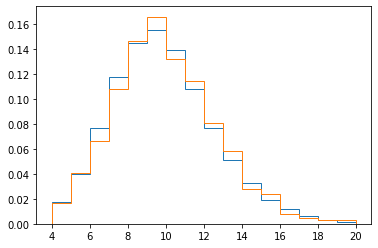

In [88]:
plt.hist(properties_known_words['length'],histtype='step', bins=np.arange(4, 21, 1), density=True)
plt.hist(properties_validation_words['length'],histtype='step', bins=np.arange(4, 21, 1), density=True)
plt.show()

In [93]:
known_first_stats = [len(properties_known_words[properties_known_words['first_letter'] == chr(i)]) for i in range(ord('a'), ord('z') + 1) ]
validation_first_stats = [len(properties_validation_words[properties_validation_words['first_letter'] == chr(i)]) for i in range(ord('a'), ord('z') + 1) ]

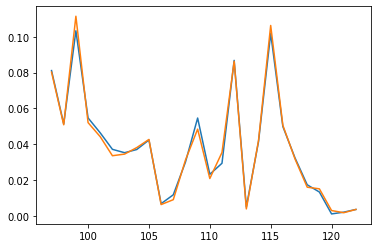

In [97]:
plt.plot(np.arange(ord('a'), ord('z')+1, 1), np.array(known_first_stats) / len(properties_known_words))
plt.plot(np.arange(ord('a'), ord('z')+1, 1), np.array(validation_first_stats) / len(properties_validation_words))
plt.show()

In [98]:
known_last_stats = [len(properties_known_words[properties_known_words['last_letter'] == chr(i)]) for i in range(ord('a'), ord('z') + 1) ]
validation_last_stats = [len(properties_validation_words[properties_validation_words['last_letter'] == chr(i)]) for i in range(ord('a'), ord('z') + 1) ]

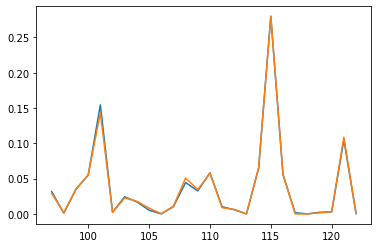

In [99]:
plt.plot(np.arange(ord('a'), ord('z')+1, 1), np.array(known_last_stats) / len(properties_known_words))
plt.plot(np.arange(ord('a'), ord('z')+1, 1), np.array(validation_last_stats) / len(properties_validation_words))
plt.show()